# Rotten Tomatoes Rating Prediction

#### Predicting parameter / Feature :  'audience_rating'
______________________________________________________________________________________________________________________________

### [1] Importing Pakages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import  XGBRegressor
from sklearn. tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR 

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics

D:\Applications\Anaconda-Navigator\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### [2] Data Loading and Basic Analysis of the data

In [2]:
df = pd.read_excel("../Downloads/Rotten_Tomatoes_Movies3.xls/Rotten_Tomatoes_Movies3.xls")

In [3]:
df.head(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [4]:
df.shape

(16638, 16)

In [5]:
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [6]:
df.isna().sum() ### these mean the count of the empty field in the data, need to be cleaned

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

### [3] Data Cleaning

In [7]:
df["rating"].unique() ### categories seems broken

array(['PG', 'R', 'NR', 'G', 'PG-13', 'PG-13)', 'NC17', 'R)'],
      dtype=object)

In [8]:
df["rating"].value_counts()

rating
R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: count, dtype: int64

In [9]:
df["rating"] = df["rating"].replace(to_replace="PG-13)", value="PG-13")
df["rating"] = df["rating"].replace(to_replace="R)", value="R")
### replacing the categories together accordingly

In [10]:
rating_count = df["rating"].value_counts()
rating_count
### rating category sorted

rating
R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: count, dtype: int64

In [11]:
df["tomatometer_status"].value_counts()
### tomatometer status category seems sorted and good

tomatometer_status
Rotten             7233
Fresh              6448
Certified Fresh    2957
Name: count, dtype: int64

In [12]:
df["genre"].value_counts()
### genre category is distored, so needs to be sorted

genre
Drama                                                                                       1727
Comedy                                                                                      1202
Comedy, Drama                                                                                819
Drama, Mystery & Suspense                                                                    683
Art House & International, Drama                                                             571
                                                                                            ... 
Action & Adventure, Art House & International, Cult Movies, Drama                              1
Animation, Art House & International, Drama, Science Fiction & Fantasy, Special Interest       1
Drama, Kids & Family, Science Fiction & Fantasy, Sports & Fitness                              1
Art House & International, Classics, Cult Movies, Horror, Science Fiction & Fantasy            1
Animation, Drama, Romanc

In [13]:
df.isna().sum() ### Firstly, cleaning the null values in the data to make usable

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [14]:
### retaining the orginal dataframe, create a rough dataframe for use
df_calc = df

In [15]:
df_calc["genre"] = df_calc["genre"].replace(to_replace=np.nan, value="Unknown Genre")
df_calc["studio_name"] = df_calc["studio_name"].replace(to_replace=np.nan, value="Unknown Studio")

In [16]:
#df_calc["audience_rating"].mean()
df_calc["audience_rating"] = df_calc["audience_rating"].replace(to_replace=np.nan, value=df_calc["audience_rating"].mean())

In [17]:
rt = df_calc["runtime_in_minutes"].mean()
rt = round(rt)
rt

102

In [18]:
df_calc["directors"] = df_calc["directors"].replace(to_replace=np.nan, value="Unknown Director")
df_calc["writers"] = df_calc["writers"].replace(to_replace=np.nan, value="Unknown Writers")
df_calc["cast"] = df_calc["cast"].replace(to_replace=np.nan, value="cast")
df_calc["runtime_in_minutes"] = df_calc["runtime_in_minutes"].replace(to_replace=np.nan, value=rt)

In [19]:
df_calc["studio_name"].value_counts()
### values are too small to have impact on the prediction so will be dropping this column

studio_name
Paramount Pictures              497
Warner Bros. Pictures           492
Universal Pictures              469
Unknown Studio                  416
20th Century Fox                414
                               ... 
Lucky Hat Entertainment           1
Pale Griot Films                  1
Roadside Attractions/Asgaard      1
RubyRed Productions               1
Tango Entertainment               1
Name: count, Length: 2887, dtype: int64

In [20]:
df_calc["directors"].value_counts()
### values are too small to have impact on the prediction so will be dropping this column

directors
Unknown Director                        114
Alfred Hitchcock                         36
Woody Allen                              36
Clint Eastwood                           35
Steven Spielberg                         32
                                       ... 
Gina Kim                                  1
Scott Beck, Bryan Woods                   1
Mac Carter                                1
Andrew Marcus                             1
Byron Howard, Rich Moore, Jared Bush      1
Name: count, Length: 8315, dtype: int64

In [21]:
df.isna().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                    0
directors                0
writers                  0
cast                     0
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes       0
studio_name              0
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating          0
dtype: int64

### [4] Feature Engineering

In [22]:
df_calc.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

Based on the visual analysis of the data, we can get to an overall idea of which feature is crucial for prediction,
While some features are optional which can be tested on, and most of the rest is not necessary.

* **Features Required :** 'rating', 'runtime_in_minutes', 'tomatometer_status','tomatometer_rating', 'tomatometer_count', 'audience_rating'


* **Features Optional :** 'genre', 'directors', 'writers', 'in_theaters_date'
   
    (Note : ignoring writers info for this prediction and will be including the other three columns)


* **Features Not Necessary :** 'movie_title', 'movie_info', 'critics_consensus', 'cast', 'studio_name', 'on_streaming_date'

In [23]:
df_calc = df.drop(["movie_title","movie_info","critics_consensus","in_theaters_date","on_streaming_date", 'cast', 'directors', 'writers','studio_name'], axis='columns')
df_calc

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",83.0,Rotten,49,144,53.0
1,R,Comedy,90.0,Certified Fresh,86,140,64.0
2,R,"Comedy, Romance",118.0,Fresh,68,22,53.0
3,NR,"Classics, Drama",95.0,Certified Fresh,100,51,97.0
4,G,"Action & Adventure, Drama, Kids & Family",127.0,Fresh,89,27,74.0
...,...,...,...,...,...,...,...
16633,R,"Drama, Musical & Performing Arts",104.0,Rotten,56,9,74.0
16634,PG,"Action & Adventure, Animation, Comedy",108.0,Certified Fresh,97,279,92.0
16635,NR,"Action & Adventure, Art House & International,...",142.0,Fresh,78,9,87.0
16636,PG,"Classics, Drama",139.0,Fresh,95,21,91.0


In [24]:
df_calc.isna().sum() ### Data looks clean

rating                0
genre                 0
runtime_in_minutes    0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64

In [25]:
### normalizing the runtime in minutes improves preformance
#df["in_theaters_date"].dtype
df["in_theaters_date"] =  df["in_theaters_date"].fillna(20241221) #adding task submission date for buffer value
df_calc["Date"] = pd.to_datetime(df["in_theaters_date"]).dt.strftime("%Y%m%d")

x_array = np.array(df_calc['Date'])
normalized_arr = preprocessing.normalize([x_array])
normalized_arr 
scaled_df = pd.DataFrame(normalized_arr)
scaled_df = scaled_df.transpose()
df_calc['Date'] = scaled_df 
df_calc

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,Date
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",83.0,Rotten,49,144,53.0,0.007799
1,R,Comedy,90.0,Certified Fresh,86,140,64.0,0.007799
2,R,"Comedy, Romance",118.0,Fresh,68,22,53.0,0.007679
3,NR,"Classics, Drama",95.0,Certified Fresh,100,51,97.0,0.007594
4,G,"Action & Adventure, Drama, Kids & Family",127.0,Fresh,89,27,74.0,0.007582
...,...,...,...,...,...,...,...,...
16633,R,"Drama, Musical & Performing Arts",104.0,Rotten,56,9,74.0,0.007687
16634,PG,"Action & Adventure, Animation, Comedy",108.0,Certified Fresh,97,279,92.0,0.007822
16635,NR,"Action & Adventure, Art House & International,...",142.0,Fresh,78,9,87.0,0.007621
16636,PG,"Classics, Drama",139.0,Fresh,95,21,91.0,0.007621


In [26]:
### normalizing the runtime in minutes improves preformance
x_arr = np.array(df_calc['runtime_in_minutes'])
n_arr = preprocessing.normalize([x_arr])
n_arr 
scaled_df = pd.DataFrame(n_arr)
scaled_df = scaled_df.transpose()
df_calc['runtime_in_minutes'] = scaled_df 
df_calc

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,Date
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",0.006106,Rotten,49,144,53.0,0.007799
1,R,Comedy,0.006621,Certified Fresh,86,140,64.0,0.007799
2,R,"Comedy, Romance",0.008682,Fresh,68,22,53.0,0.007679
3,NR,"Classics, Drama",0.006989,Certified Fresh,100,51,97.0,0.007594
4,G,"Action & Adventure, Drama, Kids & Family",0.009344,Fresh,89,27,74.0,0.007582
...,...,...,...,...,...,...,...,...
16633,R,"Drama, Musical & Performing Arts",0.007652,Rotten,56,9,74.0,0.007687
16634,PG,"Action & Adventure, Animation, Comedy",0.007946,Certified Fresh,97,279,92.0,0.007822
16635,NR,"Action & Adventure, Art House & International,...",0.010447,Fresh,78,9,87.0,0.007621
16636,PG,"Classics, Drama",0.010227,Fresh,95,21,91.0,0.007621


In [27]:
### Grouping and tranforming the director info with mean of audience rating, improves performance
directors_mean_rating = df.groupby('directors')['audience_rating'].transform('mean')
df_calc['directors_mean_rating'] = directors_mean_rating
df_calc.head()

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,Date,directors_mean_rating
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",0.006106,Rotten,49,144,53.0,0.007799,64.153846
1,R,Comedy,0.006621,Certified Fresh,86,140,64.0,0.007799,59.400000
2,R,"Comedy, Romance",0.008682,Fresh,68,22,53.0,0.007679,61.703704
3,NR,"Classics, Drama",0.006989,Certified Fresh,100,51,97.0,0.007594,65.733333
4,G,"Action & Adventure, Drama, Kids & Family",0.009344,Fresh,89,27,74.0,0.007582,60.687500


### [5] Encoding Data

In [28]:
#### Encoding "tomatometer_status"

df_calc["tomatometer_status"].value_counts()

tomatometer_status
Rotten             7233
Fresh              6448
Certified Fresh    2957
Name: count, dtype: int64

In [29]:
df_calc["tomatometer_status"] = df_calc["tomatometer_status"].replace(to_replace=["Rotten","Fresh","Certified Fresh"], value=[1,2,3])

In [30]:
df_calc.head(3)

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,Date,directors_mean_rating
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",0.006106,1,49,144,53.0,0.007799,64.153846
1,R,Comedy,0.006621,3,86,140,64.0,0.007799,59.400000
2,R,"Comedy, Romance",0.008682,2,68,22,53.0,0.007679,61.703704


In [31]:
#### Encoding "rating"

df_calc["rating"] = df_calc["rating"].replace(to_replace={"R":0,"NR":1,"PG-13":2,"PG":3,"G":4,"NC17":5})


In [32]:
#### Encoding "genre"

df_calc["genre"].value_counts()

genre
Drama                                                                                       1727
Comedy                                                                                      1202
Comedy, Drama                                                                                819
Drama, Mystery & Suspense                                                                    683
Art House & International, Drama                                                             571
                                                                                            ... 
Action & Adventure, Art House & International, Cult Movies, Drama                              1
Animation, Art House & International, Drama, Science Fiction & Fantasy, Special Interest       1
Drama, Kids & Family, Science Fiction & Fantasy, Sports & Fitness                              1
Art House & International, Classics, Cult Movies, Horror, Science Fiction & Fantasy            1
Animation, Drama, Romanc

_____________________________________________________________________________________________________________________

There are muliple genre categories given for each movie in the data. So, writing a simple function the will take the first category that it notices for each movie of the 7 main categories given below. If doesnt have any of the give categories for a movie, it will be marked as "Other".

In order to put gernes into one category, writing a simple switch case for this data

The most important categories based on visual analysis of the data

*  Comedy
*  Animation
*  Action
*  Drama
*  Horror
*  Mystery
*  Romance
*  Other

_____________________________________________________________________________________________________________________

In [33]:
gerne_list = df_calc["genre"].tolist()
gerne_list[0].split()[0]

'Action'

In [34]:
output_list = []
def genre_sorted(list_inp):
    for i in range(0,len(list_inp)):
    #for i in range(0,50):
        sub_len = len(list_inp[i].split())
        #print("i =" , i)
        for j in range(0,sub_len):
            #print("j =",j)
            
            if gerne_list[i].split()[j] in ("Comedy", "Comedy,"): 
                #print(gerne_list[i].split()[j])
                x="Comedy"
                output_list.append(x)
                break
            
            elif gerne_list[i].split()[j] in ("Animation", "Animation,"):
                #print(gerne_list[i].split()[j])
                x="Animation"
                output_list.append(x)
                break
                
            elif gerne_list[i].split()[j] in ("Action",  "Action,"):
                #print(gerne_list[i].split()[j])
                x="Action"
                output_list.append(x)
                break
                
            elif gerne_list[i].split()[j] in ("Drama",  "Drama,"):
                #print(gerne_list[i].split()[j])
                x="Drama"
                output_list.append(x)
                break
                
            elif gerne_list[i].split()[j] in ("Horror",  "Horror,"):
                #print(gerne_list[i].split()[j])
                x="Horror"
                output_list.append(x)
                break
                
            elif gerne_list[i].split()[j] in ("Mystery",  "Mystery,"):
                #print(gerne_list[i].split()[j])
                x="Mystery"
                output_list.append(x)
                break
                
            elif gerne_list[i].split()[j] in ("Romance",  "Romance,"):
                #print(gerne_list[i].split()[j])
                x="Romance"
                output_list.append(x)
                break 
                
            else :
                if j == sub_len-1:
                    #print("Sublen:",sub_len)
                    output_list.append("Other")
                    #print("Other")
                else:
                    continue
                
    print("Output List : ",output_list)
    print("Length of Output List : ",len(output_list))

In [35]:
len(gerne_list[0].split())

9

In [36]:
genre_sorted(gerne_list)
## verfied 19, 45 ==> other category

Output List :  ['Action', 'Comedy', 'Comedy', 'Drama', 'Action', 'Action', 'Action', 'Drama', 'Comedy', 'Drama', 'Horror', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Action', 'Other', 'Action', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Comedy', 'Action', 'Comedy', 'Action', 'Action', 'Animation', 'Horror', 'Horror', 'Drama', 'Drama', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Action', 'Drama', 'Other', 'Comedy', 'Drama', 'Drama', 'Drama', 'Action', 'Horror', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Horror', 'Comedy', 'Drama', 'Drama', 'Other', 'Drama', 'Other', 'Comedy', 'Other', 'Drama', 'Horror', 'Comedy', 'Drama', 'Action', 'Drama', 'Action', 'Other', 'Horror', 'Drama', 'Other', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Other', 'Other', 'Drama', 'Animation', 'Other', 'Drama', 'Comedy', 'Drama', 'Drama', 'Horror', 'Comedy', 'Horror', 'Drama', 

In [37]:
len(gerne_list)

16638

In [38]:
### Adding the obtained sorted genre category to df-calc dataframe
df_calc["genre_category"] = output_list
df_calc.head()

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,Date,directors_mean_rating,genre_category
0,3,"Action & Adventure, Comedy, Drama, Science Fic...",0.006106,1,49,144,53.0,0.007799,64.153846,Action
1,0,Comedy,0.006621,3,86,140,64.0,0.007799,59.400000,Comedy
2,0,"Comedy, Romance",0.008682,2,68,22,53.0,0.007679,61.703704,Comedy
3,1,"Classics, Drama",0.006989,3,100,51,97.0,0.007594,65.733333,Drama
4,4,"Action & Adventure, Drama, Kids & Family",0.009344,2,89,27,74.0,0.007582,60.687500,Action


In [39]:
### manual Encoding of "genre_category"

df_calc["genre_category"] = df_calc["genre_category"].replace(to_replace=
                                                              {"Comedy":0,
                                                               "Animation":1,
                                                               "Action":2,
                                                               "Drama":3,
                                                               "Horror":4,
                                                               "Mystery":5,
                                                               "Romance":6,
                                                               "Other":7})

In [40]:
df_calc = df_calc.drop(["genre"] , axis = "columns") ### dropped the unsorted genre category

In [41]:
df_calc.head()

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,Date,directors_mean_rating,genre_category
0,3,0.006106,1,49,144,53.0,0.007799,64.153846,2
1,0,0.006621,3,86,140,64.0,0.007799,59.400000,0
2,0,0.008682,2,68,22,53.0,0.007679,61.703704,0
3,1,0.006989,3,100,51,97.0,0.007594,65.733333,3
4,4,0.009344,2,89,27,74.0,0.007582,60.687500,2


### [6] Some Data Visualization to understand the correlation

<Axes: >

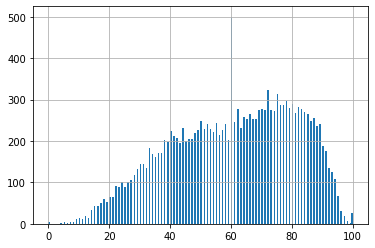

In [42]:
df_calc["audience_rating"].hist(bins=200)
### distribution of audience rating

<Axes: >

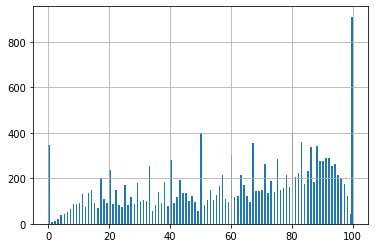

In [43]:
df_calc["tomatometer_rating"].hist(bins=200)
### distribution of tomatometer rating

<Axes: xlabel='movie_title'>

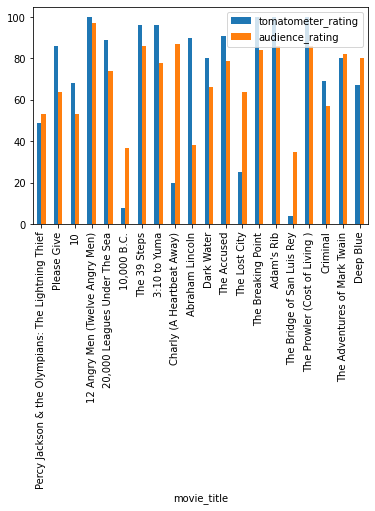

In [44]:
df_subset = df.head(20)
df_subset.plot(x="movie_title", y=["tomatometer_rating", "audience_rating"], kind="bar")

### Top 20 movies in the datalist, show the tomatometer rating and audience rating fall close with differnce of about 10 to 20 points in general

In [45]:
df_calc["genre_category"].value_counts()

#{"Comedy":0,"Animation":1,"Action":2,"Drama":3,"Horror":4,"Mystery":5,"Romance":6, "Other":7}

genre_category
3    5299
0    4493
2    3353
7    1717
4    1057
1     344
5     330
6      45
Name: count, dtype: int64

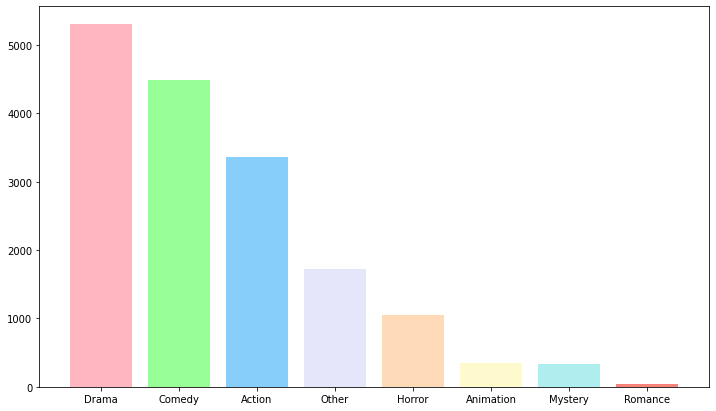

In [46]:
figure = plt.figure(figsize=(12,7))
axes = figure.add_subplot()

axes.bar(range(8),df_calc["genre_category"].value_counts(), tick_label=["Drama","Comedy","Action","Other","Horror","Animation","Mystery","Romance"],
    color=["#FFB6C1", "#98FF98", "#87CEFA", "#E6E6FA", "#FFDAB9", "#FFFACD", "#AFEEEE","#F88379"])

plt.show()

In [47]:
df_calc["rating"].value_counts()
##{"R":0,"NR":1,"PG-13":2,"PG":3,"G":4,"NC17":5}

rating
0    6137
1    4862
2    2888
3    2062
4     652
5      37
Name: count, dtype: int64

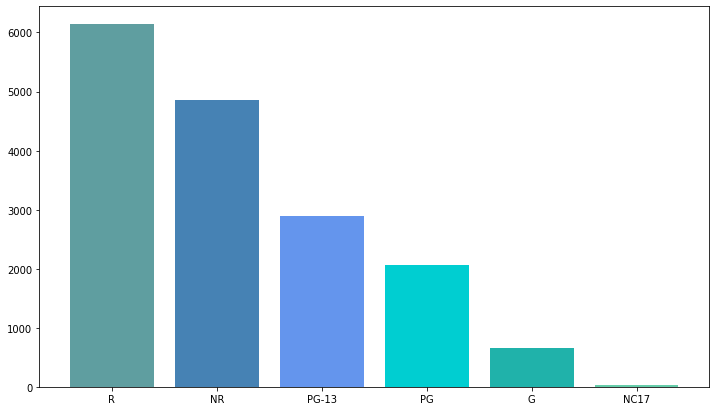

In [48]:
figure = plt.figure(figsize=(12,7))
axes1 = figure.add_subplot()

axes1.bar(range(6),df_calc["rating"].value_counts(), tick_label=["R","NR","PG-13","PG","G","NC17"],
    color=["#5F9EA0", "#4682B4", "#6495ED", "#00CED1", "#20B2AA", "#66CDAA", "#778899", "#2F4F4F"])

plt.show()

In [49]:
df_calc["tomatometer_status"].value_counts()
##["Rotten:0","Fresh:1","Certified Fresh:2"]

tomatometer_status
1    7233
2    6448
3    2957
Name: count, dtype: int64

D:\Applications\Anaconda-Navigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='tomatometer_status', ylabel='count'>

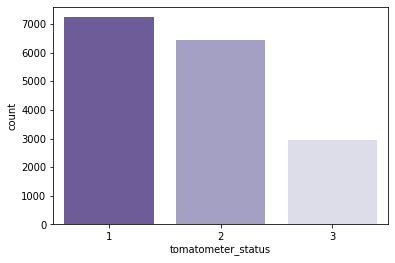

In [50]:
sns.countplot(df_calc["tomatometer_status"],palette="Purples_r")

In [51]:
df_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rating                 16638 non-null  int64  
 1   runtime_in_minutes     16638 non-null  float64
 2   tomatometer_status     16638 non-null  int64  
 3   tomatometer_rating     16638 non-null  int64  
 4   tomatometer_count      16638 non-null  int64  
 5   audience_rating        16638 non-null  float64
 6   Date                   16638 non-null  float64
 7   directors_mean_rating  16638 non-null  float64
 8   genre_category         16638 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.1 MB


In [52]:
df_calc.columns

Index(['rating', 'runtime_in_minutes', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'Date',
       'directors_mean_rating', 'genre_category'],
      dtype='object')

### [7] Splitting Data

In [53]:
X=df_calc[['rating', 'tomatometer_status','tomatometer_rating', 'tomatometer_count', 'genre_category',"runtime_in_minutes","Date",'directors_mean_rating']]

In [54]:
y = df_calc['audience_rating']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
### 20 percent of data given for testing and rest 80 percent for training

### [8] Building and Testing Model performance

#### Linear Regression

In [56]:
lp = LinearRegression()
lp.fit(X_train,y_train)

LinearRegression()

In [57]:
print(lp.intercept_)
print(lp.coef_)

22.297290351635944
[ 4.31904505e-01  3.26837942e+00  1.49487566e-01 -2.10932631e-03
 -1.34912958e-01  4.68573370e+02 -3.53681759e+03  7.80558907e-01]


In [58]:
y_pred_lr = lp.predict(X_test)
y_pred_lr

array([53.39540296, 67.29958938, 56.50926173, ..., 51.7435881 ,
       69.20300303, 79.21183435])

D:\Applications\Anaconda-Navigator\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='audience_rating', ylabel='Density'>

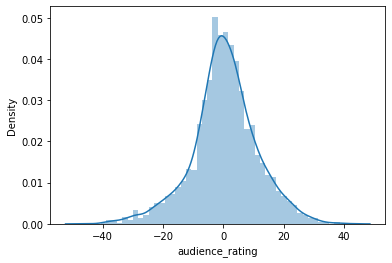

In [59]:
sns.distplot(y_test-y_pred_lr)

#### Function to find the error rates of models and to predict accuracy

In [60]:
def eval_func(actual_value, pred_value, model_name):
    
    mn = model_name
    
    print(mn.upper(),"\n")
    ### R Squared value

    # Formula => (estimated value - mean) / (actual value - mean)

    # Formula => r2score = ( mean( ( pred_y - mean(y) )^2 ) ) / ( mean( ( actual_y - mean(y) )^2 ) )


    R2score = metrics.r2_score(actual_value, pred_value)
    print("Proportion of variance R2Score: ", round(R2score, 2))
    print(" <0.5 lower to bad fit , >0.5 is good fit \n")
    
    #------------------------------------------------------------------

    ### Mean Squared Error 
    # average squared difference between the predicted and the actual value

    # Formula => mse =  mean( (pred_y - actual y)^2 ) / n )

    mse = metrics.mean_squared_error(actual_value, pred_value)

    print("Mean Squared Error : ", round(mse,2))

    ### Root Mean Squared Error

    # Formula => rmse = sqrt( mean( (pred_y - actual y)^2 ) / n )

    rmse = np.sqrt(mse)

    print("Root Mean Squared Error : ", round(rmse,2))
    print("Lower the RMSE better the predictions \n")
    ### Lower the error better the predictions

    #------------------------------------------------------------------

    ### Mean Asolute Error 

    # Formula => mape = ( mean ( (actual value – pred value) / actual value )  ) / n

    mae = ((abs(actual_value-pred_value)))
    mae = np.mean(mae)
    print("Mean Asolute Error : ", round(mae,2))
    print("Lower the error of MAE better the predictions")

    acc_mae  = 100 - np.mean(mae) ## taking mean
    print("Accuracy based on MAE : ", round(acc_mae,2), "%\n")

    #mae = metrics.mean_absolute_error(actual_value, pred_value)
    #print("Mean Asbolute Error : ", round(mae,2))
    #lower the value, the better the performance

    #------------------------------------------------------------------

    ### Mean abs percentage of errors ==> Best for forecasting, future predicting models

    # Formula => mape = ( mean ( ( (actual value – pred value) / actual value ) *100) ) / n

    mape  = 100 * ((abs(actual_value-pred_value))/actual_value)

    acc_mean_mape  = 100 - np.mean(mape) ## taking mean

    acc_median_mape = 100 - np.median(mape) ## taking median

    print("Accuracy based on MAPE using mean : ", round(acc_mean_mape,2), "%")
    print("Accuracy based on MAPE using median : ", round(acc_median_mape,2), "% \n")

    #mape = metrics.mean_absolute_percentage_error(actual_value, pred_value) ### using predefined function
    #mape = 100-(mape*100)
    #print("Mean Asbolute Percentage Error : ", round(mape,2))

    #------------------------------------------------------------------

    ###Standard Error of Estimate (SEE)

    # Formula => errors = sqrt( mean( (pred_y - actual y)^2 ) / n-2 )

    err = (pred_value - actual_value) * (pred_value - actual_value)
    se = err.mean()
    l = len(actual_value)
    l = l-2
    n = se/l
    see = np.sqrt(n)

    print("Standard Error Estimate : ", round(see,2))
    print("Lower the SEE error rate better the predictions")
    ### Lower the error better the predictions
    

    

In [61]:
lr_eval = eval_func(y_test, y_pred_lr,"Linear Regression")
lr_eval

LINEAR REGRESSION 

Proportion of variance R2Score:  0.71
 <0.5 lower to bad fit , >0.5 is good fit 

Mean Squared Error :  120.13
Root Mean Squared Error :  10.96
Lower the RMSE better the predictions 

Mean Asolute Error :  8.16
Lower the error of MAE better the predictions
Accuracy based on MAE :  91.84 %

Accuracy based on MAPE using mean :  83.09 %
Accuracy based on MAPE using median :  89.49 % 

Standard Error Estimate :  0.19
Lower the SEE error rate better the predictions


#### SVM Regression

In [62]:
svr = SVR(kernel='linear') 
svr.fit(X_train,y_train) 
y_pred_svm  = svr.predict(X_test) 
svm_eval = eval_func(y_test, y_pred_svm, "Support Vector Machines")
svm_eval

SUPPORT VECTOR MACHINES 

Proportion of variance R2Score:  0.66
 <0.5 lower to bad fit , >0.5 is good fit 

Mean Squared Error :  143.19
Root Mean Squared Error :  11.97
Lower the RMSE better the predictions 

Mean Asolute Error :  8.08
Lower the error of MAE better the predictions
Accuracy based on MAE :  91.92 %

Accuracy based on MAPE using mean :  83.13 %
Accuracy based on MAPE using median :  92.56 % 

Standard Error Estimate :  0.21
Lower the SEE error rate better the predictions


#### RandomForestRegressor

In [63]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
rfr_eval = eval_func(y_test, y_pred_rfr, "Random Forest Regressor")
rfr_eval

RANDOM FOREST REGRESSOR 

Proportion of variance R2Score:  0.75
 <0.5 lower to bad fit , >0.5 is good fit 

Mean Squared Error :  106.84
Root Mean Squared Error :  10.34
Lower the RMSE better the predictions 

Mean Asolute Error :  7.27
Lower the error of MAE better the predictions
Accuracy based on MAE :  92.73 %

Accuracy based on MAPE using mean :  84.81 %
Accuracy based on MAPE using median :  92.1 % 

Standard Error Estimate :  0.18
Lower the SEE error rate better the predictions


#### Desicion Tree Regressor

In [64]:
dt = DecisionTreeRegressor(max_depth=8)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_eval = eval_func(y_test,y_pred_dt, "Desicion Tree Regressor")
dt_eval

DESICION TREE REGRESSOR 

Proportion of variance R2Score:  0.71
 <0.5 lower to bad fit , >0.5 is good fit 

Mean Squared Error :  120.31
Root Mean Squared Error :  10.97
Lower the RMSE better the predictions 

Mean Asolute Error :  7.77
Lower the error of MAE better the predictions
Accuracy based on MAE :  92.23 %

Accuracy based on MAPE using mean :  83.77 %
Accuracy based on MAPE using median :  91.71 % 

Standard Error Estimate :  0.19
Lower the SEE error rate better the predictions


#### K-Nearest Neighbors Regressor

In [65]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
knn_eval = eval_func(y_test,y_pred_knn,"K-Nearest Neighbors Regressor")
knn_eval

K-NEAREST NEIGHBORS REGRESSOR 

Proportion of variance R2Score:  0.7
 <0.5 lower to bad fit , >0.5 is good fit 

Mean Squared Error :  126.9
Root Mean Squared Error :  11.26
Lower the RMSE better the predictions 

Mean Asolute Error :  8.25
Lower the error of MAE better the predictions
Accuracy based on MAE :  91.75 %

Accuracy based on MAPE using mean :  83.02 %
Accuracy based on MAPE using median :  90.1 % 

Standard Error Estimate :  0.2
Lower the SEE error rate better the predictions


#### Lasso Regression

In [66]:
lss = LassoCV()
lss.fit(X_train,y_train)
y_pred_lss = lss.predict(X_test)
lss_eval = eval_func(y_test,y_pred_lss,"Lasso Regression")
lss_eval

LASSO REGRESSION 

Proportion of variance R2Score:  0.71
 <0.5 lower to bad fit , >0.5 is good fit 

Mean Squared Error :  123.17
Root Mean Squared Error :  11.1
Lower the RMSE better the predictions 

Mean Asolute Error :  8.28
Lower the error of MAE better the predictions
Accuracy based on MAE :  91.72 %

Accuracy based on MAPE using mean :  82.82 %
Accuracy based on MAPE using median :  89.32 % 

Standard Error Estimate :  0.19
Lower the SEE error rate better the predictions


#### Elastic Net

In [67]:
eln = ElasticNetCV()
eln.fit(X_train,y_train)
y_pred_eln = eln.predict(X_test)
eln_eval = eval_func(y_test,y_pred_eln,"Elastic Net")
eln_eval

ELASTIC NET 

Proportion of variance R2Score:  0.7
 <0.5 lower to bad fit , >0.5 is good fit 

Mean Squared Error :  124.03
Root Mean Squared Error :  11.14
Lower the RMSE better the predictions 

Mean Asolute Error :  8.31
Lower the error of MAE better the predictions
Accuracy based on MAE :  91.69 %

Accuracy based on MAPE using mean :  82.74 %
Accuracy based on MAPE using median :  89.26 % 

Standard Error Estimate :  0.19
Lower the SEE error rate better the predictions


#### Using GridSearchCV with Ridge Regression for Hyper Parameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [69]:
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

grid = GridSearchCV(Ridge(), param_grid,cv=5)  
grid.fit(X_train, y_train) 
 
# best parameter after tuning 
print(grid.best_params_) 
y_pred_gscv = grid.predict(X_test) 

gscv_eval = eval_func(y_test,y_pred_gscv,"GridSearchCV with Ridge Regression")
gscv_eval

### no major improvement

{'alpha': 0.1}
GRIDSEARCHCV WITH RIDGE REGRESSION 

Proportion of variance R2Score:  0.71
 <0.5 lower to bad fit , >0.5 is good fit 

Mean Squared Error :  120.92
Root Mean Squared Error :  11.0
Lower the RMSE better the predictions 

Mean Asolute Error :  8.2
Lower the error of MAE better the predictions
Accuracy based on MAE :  91.8 %

Accuracy based on MAPE using mean :  83.04 %
Accuracy based on MAPE using median :  89.48 % 

Standard Error Estimate :  0.19
Lower the SEE error rate better the predictions


#### Final Examination of model performance
* Overall Analysis, Accurary ranges from 82 to 92 % on an average based of different analysing metrics
* Error rates are possibly lower which provides and show stability in predictions and R^2 Score on average is 0.7 which is good.
* Of the tested models, as of the current analysis "Random Forest Regressor" out performs others.

___________________________________________________________________________________________________________________________